# Stability of SSPALS: Range, t0, FWHM, and DF

### Configure Ipython

In [1]:
#import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import custom packages
import oskar

### Import Data

In [2]:
rid = '20160424_115511'
#h5 = oskar.H5Data(rid, dire='C:\\Users\\Adam\Desktop')              # data from specific directory
h5 = oskar.H5Data(rid)                                               # data
h5.load_log()
out_dire = h5.out_dire("Stability")                                  # output

In [3]:
#read data
allDF = h5.load_average(verbose=True)
allDF.head()

Loaded: av_SSPALS.dat


,DATETIME,ACQUIRE,END,ERROR,LOOP,START,DLY_EA,DLY_GA,IR,VOL_u101,...,DF_std,DF_sem,Range_reps,Range_mean,Range_std,Range_sem,FWHM_reps,FWHM_mean,FWHM_std,FWHM_sem
SQUID,,,,,,,,,,,,,,,,,,,,,
1,2016-04-24 11:55:21,99.820709,3.544340e+09,0.0,1,3.544340e+09,6.350000e-07,0.000001,756.77,200,...,0.009093,0.000909,100,0.227974,0.011062,0.001106,100,1.050843e-08,5.512484e-10,5.512484e-11
2,2016-04-24 11:57:10,99.835711,3.544340e+09,0.0,1,3.544340e+09,6.350000e-07,0.000001,760.73,200,...,0.007650,0.000765,100,0.228227,0.011895,0.001190,100,1.064784e-08,6.698179e-10,6.698179e-11
3,2016-04-24 11:58:59,99.813709,3.544340e+09,0.0,1,3.544340e+09,6.350000e-07,0.000010,756.41,200,...,0.007403,0.000740,100,0.227858,0.013311,0.001331,100,1.051988e-08,7.462244e-10,7.462244e-11
4,2016-04-24 12:00:48,99.817709,3.544341e+09,0.0,1,3.544340e+09,6.350000e-07,0.000010,756.71,200,...,0.007521,0.000752,100,0.228662,0.011317,0.001132,100,1.054993e-08,5.794849e-10,5.794849e-11
5,2016-04-24 12:02:37,99.816709,3.544341e+09,0.0,1,3.544341e+09,6.350000e-07,0.000010,757.49,200,...,0.008303,0.000830,100,0.229318,0.011988,0.001199,100,1.044007e-08,5.988095e-10,5.988095e-11


In [4]:
#calculate time elapsed
allDF['ELAPSED'] = (allDF.DATETIME - allDF.DATETIME.min())/ np.timedelta64(1, 'h')

### Plot Data

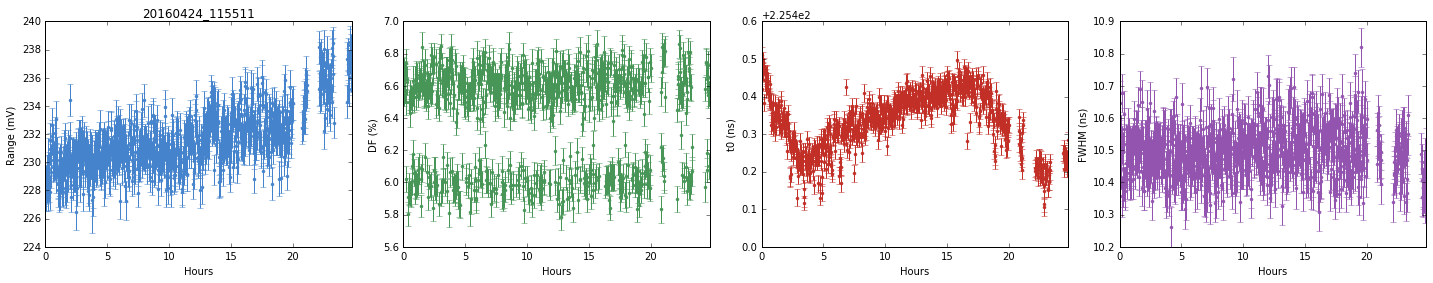

In [6]:
#plot setup
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
#plot
X = 'ELAPSED'
x_vals = allDF[X].values

#range
Y = ['Range', 'DF', 't0', 'FWHM']
rescale = [1e3, 1e2, 1e9, 1e9]
units = ['mV', '%', 'ns', 'ns']
for i in range(4):
    y_vals = allDF[Y[i]+'_mean'].values*rescale[i]
    yerr = allDF[Y[i]+'_sem'].values*rescale[i]
    ax[i].errorbar(x_vals, y_vals, yerr=yerr, fmt='.', color=oskar.colors[i%7])
    ax[i].set_xlim(np.nanmin(x_vals), np.nanmax(x_vals))
    ax[i].set_ylabel(Y[i] + ' (' + units[i] + ')');
    ax[i].set_xlabel("Hours");
#labels

ax[0].set_title(rid);

#save data
plt.tight_layout();
fileout = os.path.join(out_dire, 'stab.png')
plt.savefig(fileout, dpi=300)